## Following operations should be performed using Keras or PyTorch or Torch vision-

### Import the necessary libraries

In [ ]:
from tensorflow.keras import layers, optimizers, models, losses
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

#from tensorflow.keras.applications.densenet import preprocess_input

import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Plot the sample images for all the classes

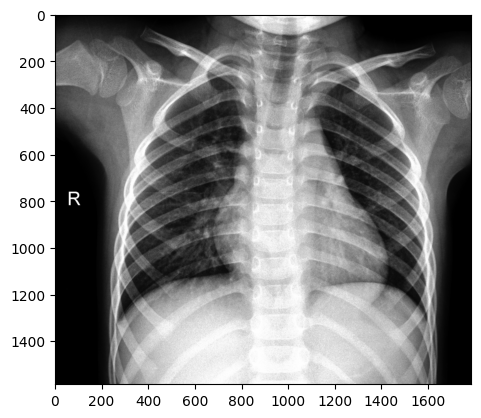

In [ ]:
healthy_img = Image.open('/content/drive/MyDrive/Codes/Datasets/Lung_Infection/test/healthy/0101.jpeg')
plt.imshow(healthy_img)

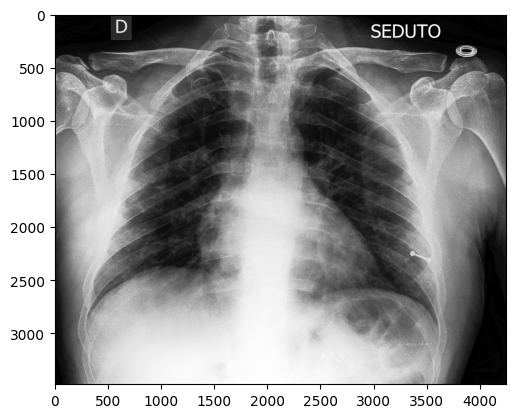

In [ ]:
Type_1_img = Image.open('/content/drive/MyDrive/Codes/Datasets/Lung_Infection/train/Type 1 disease/01.jpeg')
plt.imshow(Type_1_img)

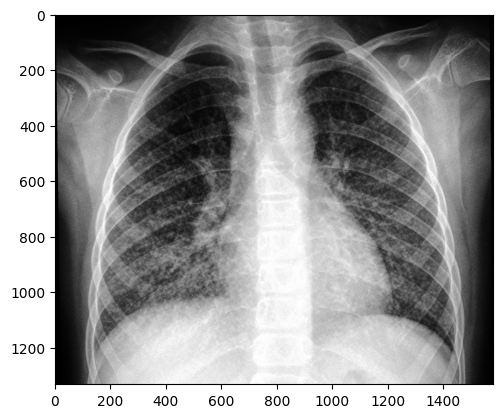

In [ ]:
Type_2_img = Image.open('/content/drive/MyDrive/Codes/Datasets/Lung_Infection/train/Type 2 disease/01.jpeg')
plt.imshow(Type_2_img)

### Plot the distribution of images across the classes

{'Healthy': 70, 'Type 1 disease': 111, 'Type 2 disease': 70}


<BarContainer object of 3 artists>

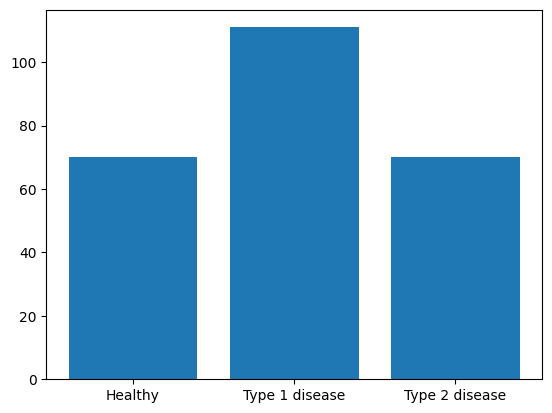

In [ ]:
import os

path = '/content/drive/MyDrive/Codes/Datasets/Lung_Infection/train/'
class_dist = {}
count = 0

for i in os.listdir(path):
  flag = 0
  for j in os.listdir(path+i+'/'):
    if(flag == 0):
      class_dist[i] = 1
      flag = 1
    else:
      class_dist[i] += 1
print(class_dist)
plt.bar(class_dist.keys(),[class_dist[i] for i in class_dist.keys()])
#plt.bar(class_dist.keys(),[class_dist['Healthy'],class_dist['Type 1 disease'], class_dist['Type 2 disease']])

### Build a data augmentation for train data to create new data with translation, rescale and flip, and rotation transformations. Rescale the image at 48x48

In [ ]:
test_image = ImageDataGenerator(rescale=1/255.,
                                horizontal_flip = True,
                                vertical_flip = True,
                                rotation_range=35)

### Build a data augmentation for test data to create new data and rescale the image at 48x48

In [ ]:
train_image = ImageDataGenerator(rescale=1/255.,
                                horizontal_flip=True,
                                vertical_flip = True,
                                rotation_range=35)

### Read images directly from the train folder and test folder using the appropriate function

In [ ]:
trainImageset = train_image.flow_from_directory('/content/drive/MyDrive/Codes/Datasets/Lung_Infection/train',target_size=(224,224),batch_size=4)
testImageset = test_image.flow_from_directory('/content/drive/MyDrive/Codes/Datasets/Lung_Infection/test',target_size=(224,224),batch_size=4)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


## Build 3 CNN model with:

### 1.CNN Architecture:

### 1. Add convolutional layers with different filters, max pool layers, dropout layers, and batch normalization layers  

### 2. Use Relu as an activation function

In [ ]:
def convModel():
    model = models.Sequential()

    model.add(layers.Conv2D(16,(3,3),input_shape=trainImageset.image_shape,activation='relu',padding='same'))
    model.add(layers.Conv2D(16,(3,3),activation='relu',padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(32,(3,3),activation='relu',padding='same'))
    model.add(layers.Conv2D(32,(3,3),activation='relu',padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
    model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(128,(3,3),activation='relu',padding='same'))
    model.add(layers.Conv2D(128,(3,3),activation='relu',padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(256,(3,3),activation='relu',padding='same'))
    model.add(layers.Conv2D(256,(3,3),activation='relu',padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(len(trainImageset.class_indices.keys()),activation='softmax'))

    return model


### 3. Take the loss function as categorical cross-entropy
### 4. Take rmsprop as an optimizer
### 5. Use early stopping with the patience of two epochs and monitor the validation loss or accuracy

In [ ]:
model = convModel()
callback = EarlyStopping(monitor='val_accuracy',patience=2, min_delta = 0 )
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                   

### 6. Try with ten numbers epoch
### 7. Train the model using a generator and test the accuracy of the test data at every epoch

In [ ]:
model_hist = model.fit(trainImageset,epochs=10,validation_data=testImageset,callbacks=[callback])

Epoch 1/10
63/63 [==============================] - 109s 2s/step - loss: 1.1011 - accuracy: 0.4223 - val_loss: 1.1119 - val_accuracy: 0.3030
Epoch 2/10
63/63 [==============================] - 62s 979ms/step - loss: 1.0824 - accuracy: 0.4422 - val_loss: 1.1106 - val_accuracy: 0.3030
Epoch 3/10
63/63 [==============================] - 61s 964ms/step - loss: 1.0849 - accuracy: 0.4422 - val_loss: 1.2099 - val_accuracy: 0.3030


### 8. Plot the training and validation accuracy, and the loss

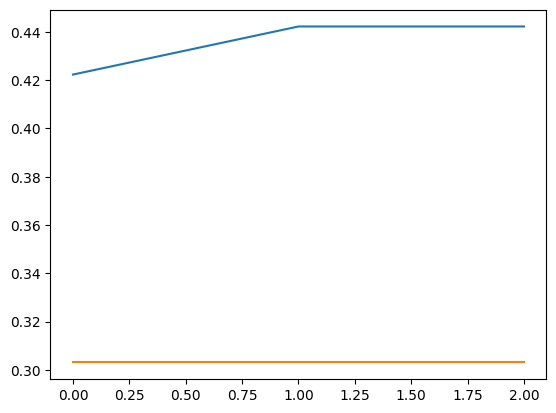

In [ ]:
plt.plot(model_hist.history["accuracy"])
plt.plot(model_hist.history["val_accuracy"])
plt.show()

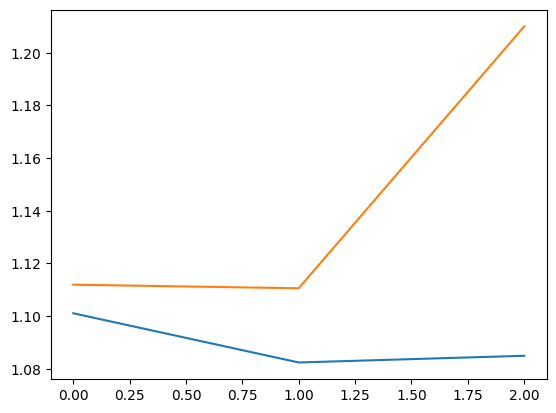

In [ ]:
plt.plot(model_hist.history["loss"])
plt.plot(model_hist.history["val_loss"])
plt.show()

In [ ]:
testImageset.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

### 9. Observe the precision, recall the F1-score for all classes for both grayscale and color models, and determine if the model’s classes are good

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score
import numpy as np

y_preds = model.predict(testImageset)

17/17 [==============================] - 6s 352ms/step


In [ ]:
CNN_metrices = {}

In [ ]:
CNN_metrices['precision'] = precision_score(testImageset.labels,y_preds.argmax(axis=1),average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
CNN_metrices['f1'] = f1_score(testImageset.labels,y_preds.argmax(axis=1),average='weighted')

In [ ]:
CNN_metrices['recall'] = recall_score(testImageset.labels,y_preds.argmax(axis=1),average='weighted')

From the above analysis we can surely tale the model didn't perform that well, the [precision: 0.09, recall: 0.30, f1_score: 0.14].

## 2 Transfer learning using mobile net:

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input

### 1. Prepare data for the pre-trained mobile net model, with color mode as RGB

In [ ]:
train_image_mobilenet = ImageDataGenerator(rescale = 1/255.0, preprocessing_function=preprocess_input)
test_image_mobilenet = ImageDataGenerator(rescale = 1/255.0, preprocessing_function=preprocess_input)

In [ ]:
trainImageset = train_image_mobilenet.flow_from_directory('/content/drive/MyDrive/Codes/Datasets/Lung_Infection/train',
                                                target_size=(224,224),
                                                color_mode = 'rgb',
                                                batch_size=1
                                                )
testImageset = test_image_mobilenet.flow_from_directory('/content/drive/MyDrive/Codes/Datasets/Lung_Infection/test',
                                              target_size=(224,224),
                                              color_mode = 'rgb',
                                              batch_size=1
                                              )

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


### 2. Create an instance of a mobile net pre-trained model

In [ ]:
base_model = MobileNet(input_shape=trainImageset.image_shape ,weights='imagenet',include_top = False)
x=base_model.output


17225924/17225924 [==============================] - 0s 0us/step


### 3. Add dense layer, dropout layer, batch normalization layer on the pre-trained model
### 4. Create a final output layer with a SoftMax activation function

In [ ]:
x = layers.Flatten()(x)
x = layers.Dense(4096,activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
#x = layers.Dense(2048,activation='relu')(x)
predict = layers.Dense(3,activation='softmax')(x)

model = models.Model(inputs=base_model.input,outputs=predict)

### 5. Change the batch size activation function and optimize as rmsprop and observe if the accuracy increases
### 6. Take the loss function as categorical cross-entropy

In [ ]:
callback = EarlyStopping(monitor='val_Accuracy',patience=2, min_delta = 0 )
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['Accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

### 7. Use early stopping with the patience of two epoch and call back function for preventing overfitting
### 8. Try with ten numbers epoch
### 9. Train the model using a generator and test the accuracy of the test data at every epoch

In [ ]:
model_hist = model.fit(trainImageset,epochs=10,validation_data=testImageset,callbacks=[callback])

Epoch 1/10
251/251 [==============================] - 740s 3s/step - loss: 1.1074 - Accuracy: 0.3944 - val_loss: 4.6930 - val_Accuracy: 0.4545
Epoch 2/10
251/251 [==============================] - 729s 3s/step - loss: 1.0851 - Accuracy: 0.4223 - val_loss: 19.0404 - val_Accuracy: 0.2727
Epoch 3/10
251/251 [==============================] - 743s 3s/step - loss: 1.1098 - Accuracy: 0.4263 - val_loss: 24.6517 - val_Accuracy: 0.3788
Epoch 4/10
251/251 [==============================] - 739s 3s/step - loss: 1.1075 - Accuracy: 0.4064 - val_loss: 55.8266 - val_Accuracy: 0.2879


### 10. Plot the training and validation accuracy, and the loss

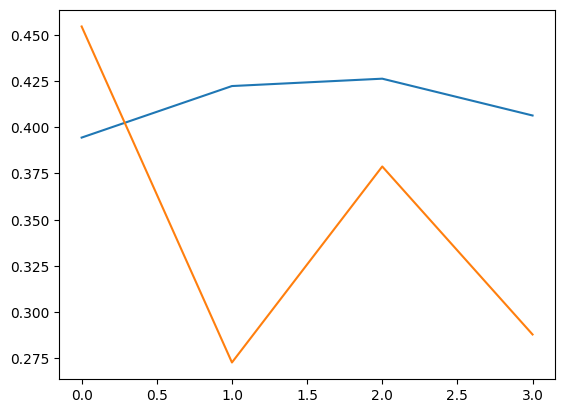

In [ ]:
plt.plot(model_hist.history['Accuracy'])
plt.plot(model_hist.history['val_Accuracy'])
plt.show()

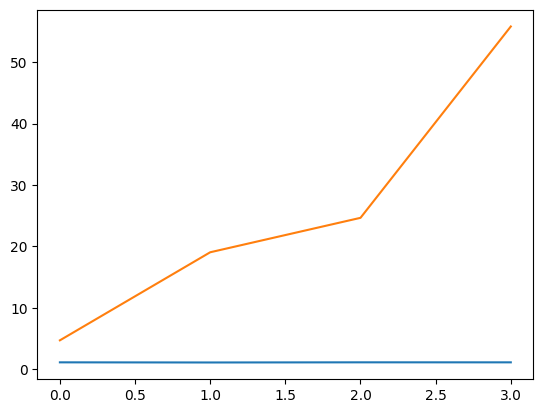

In [ ]:
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.show()

### 11. Observe the precision, recall the F1-score for all classes for both grayscale and color models, and determine if the model’s classes are good

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score
import numpy as np

y_preds = model.predict(testImageset)


66/66 [==============================] - 10s 141ms/step


In [ ]:
mobilenet_metrices = {}

In [ ]:
mobilenet_metrices['precision'] = precision_score(testImageset.labels,y_preds.argmax(axis=1),average='weighted')

In [ ]:
mobilenet_metrices['f1'] = f1_score(testImageset.labels,y_preds.argmax(axis=1),average='weighted')

In [ ]:
mobilenet_metrices['recall'] = recall_score(testImageset.labels,y_preds.argmax(axis=1),average='weighted')

## 3. Transfer Learning using Densenet121:

### 1. Prepare the dataset for the transfer learning algorithm using Densenet121 with the image size as 224x224x3

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

In [ ]:
train_image_densenet = ImageDataGenerator(rescale=1/255.,preprocessing_function=preprocess_input)
test_image_densenet = ImageDataGenerator(rescale=1/255.,preprocessing_function=preprocess_input)

In [ ]:
train_imageset_densenet = train_image_densenet.flow_from_directory('/content/drive/MyDrive/Codes/Datasets/Lung_Infection/train',
                                                                   target_size=(224,224))
test_imageset_densenet = test_image_densenet.flow_from_directory('/content/drive/MyDrive/Codes/Datasets/Lung_Infection/test',
                                                                   target_size=(224,224))

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [ ]:
densenet_base_model = DenseNet121(input_shape=train_imageset_densenet.image_shape,include_top=False)


29084464/29084464 [==============================] - 0s 0us/step


### 2. Freeze the top layers of the pre-trained model

In [ ]:
densenet_base_model.layers[0].trainable = False

### 3. Add a dense layer at the end of the pre-trained model followed by a dropout layer and try various combinations to get an accuracy

### 4. Add the final output layer with a SoftMax activation function

In [ ]:
x = densenet_base_model.output
x = layers.Flatten()(x)
x = layers.Dense(1024,activation='relu')(x)
x = layers.Dropout(0.2)(x)
#x = layers.Dense(1024,activation='relu')(x)
densenet_predict = layers.Dense(3,activation='softmax')(x)

model = models.Model(inputs=densenet_base_model.input,outputs=densenet_predict)

### 5. Take loss function as categorical cross-entropy

### 6. Take Adam as an optimizer

### 7. Use early stopping to prevent overfitting

In [ ]:
callback = EarlyStopping(monitor='val_accuracy',patience=2, min_delta = 0 )
model.compile(optimizer='ADAM',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_2[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']    

### 8. Try with 15 number of epoch and batch size with seven, also try various values to see the impact on results
### 9. Train the model using the generator and test the accuracy of the test data at every epoch

In [ ]:
model_hist_densenet = model.fit(train_imageset_densenet,epochs=15,validation_data=test_imageset_densenet,callbacks= [callback])

###  10. Plot the training and validation accuracy, and the loss

In [ ]:
plt.plot(model_hist_densenet.history['accuracy'])
plt.plot(model_hist_densenet.history['val_accuracy'])
plt.show()

In [ ]:
plt.plot(model_hist_densenet.history['loss'])
plt.plot(model_hist_densenet.history['val_loss'])
plt.show()

### 11. Observe the precision, recall the F1-score for all classes for both grayscale and color models, and determine if the model’s classes are good

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score
import numpy as np

y_preds = model.predict(test_imageset_densenet)

In [ ]:
densenet_metrices = {}

In [ ]:
densenet_metrices['precison'] = precision_score(test_imageset_densenet.labels,y_preds.argmax(axis=1),average='weighted')

In [ ]:
densenet_metrices['f1']= f1_score(test_imageset_densenet.labels,y_preds.argmax(axis=1),average='weighted')

In [ ]:
densenet_metrices['recall'] = recall_score(test_imageset_densenet.labels,y_preds.argmax(axis=1),average='weighted')

##Final step:   


### 1.Compare all the models on the basis of accuracy, precision, recall, and f1-score

In [ ]:
plt.bar(CNN_metrices.keys(),[CNN_metrices[i] for i in CNN_metrices.keys()])

In [ ]:
plt.bar(mobilenet_metrices.keys(),[mobilenet_metrices[i] for i in mobilenet_metrices.keys()])

In [ ]:
plt.bar(densenet_metrices.keys(),[densenet_metrices[i] for i in densenet_metrices.keys()])

From the above comparison we can notice that all the models suffers with over-fitting no model performed better than other, so this is not a problem with the model architecture but rather the amount of data the models are trained with. Its only 251 images all total that the models are trained with.